# AI/ML-Based Personalized Diet Plan Generator
## Milestone 1: Data Collection and Preprocessing

The goal of this milestone is to collect medical data, extract text from scanned medical reports using OCR, and convert both numeric and textual data into a structured format for further analysis.


## Dataset 1: Diabetes Risk Indicators Dataset

This dataset contains structured medical information related to diabetes risk.
It includes measurable health parameters such as glucose level, blood pressure,
BMI, insulin level, and age.

The purpose of using this dataset in Milestone 1 is to understand the structure
of numeric medical data and prepare it for further preprocessing and analysis
in later stages of the project.


In [6]:
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
638,7,97,76,32,91,40.9,0.871,32,1
452,0,91,68,32,210,39.9,0.381,25,0
687,1,107,50,19,0,28.3,0.181,29,0
594,6,123,72,45,230,33.6,0.733,34,0
641,4,128,70,0,0,34.3,0.303,24,0


In [4]:
(diabetes_df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Several medical attributes such as glucose, blood pressure, and BMI
contain zero values which are physiologically unrealistic.
These will require preprocessing before model training.


## Dataset 2: Medical Reports (Scanned Images)

In addition to structured medical datasets, scanned medical reports are
collected to extract clinical information that is not readily available
in tabular format.

These reports contain laboratory test results such as blood counts,
liver function tests, and infection markers. Optical Character Recognition
(OCR) is used to extract textual data from these images for further processing.


In [9]:
from google.colab import files
uploaded = files.upload()

Saving KOL-0425-PA-0004068_E-1745819838697ANKURSAXENAFINALBILLconverted_250428_1144@E.pdf_page_16.png to KOL-0425-PA-0004068_E-1745819838697ANKURSAXENAFINALBILLconverted_250428_1144@E.pdf_page_16 (1).png
Saving IND-0425-PA-0033745_SANTOSH2_28-04-2025_1029-26_AM@G.pdf_page_2.png to IND-0425-PA-0033745_SANTOSH2_28-04-2025_1029-26_AM@G.pdf_page_2 (1).png
Saving GUR-0425-PA-0057931_F-SachinPreAuth_250427_1410@G.pdf_page_12.png to GUR-0425-PA-0057931_F-SachinPreAuth_250427_1410@G.pdf_page_12 (1).png
Saving DEL-0425-PA-0051395_FINAL BILL OF Mrs. GANIPISETTY RAJYALAKSHMI_27-04-2025_0328-59_PM@E.pdf_page_26.png to DEL-0425-PA-0051395_FINAL BILL OF Mrs. GANIPISETTY RAJYALAKSHMI_27-04-2025_0328-59_PM@E.pdf_page_26 (1).png
Saving AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_4.png to AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_4 (1).png


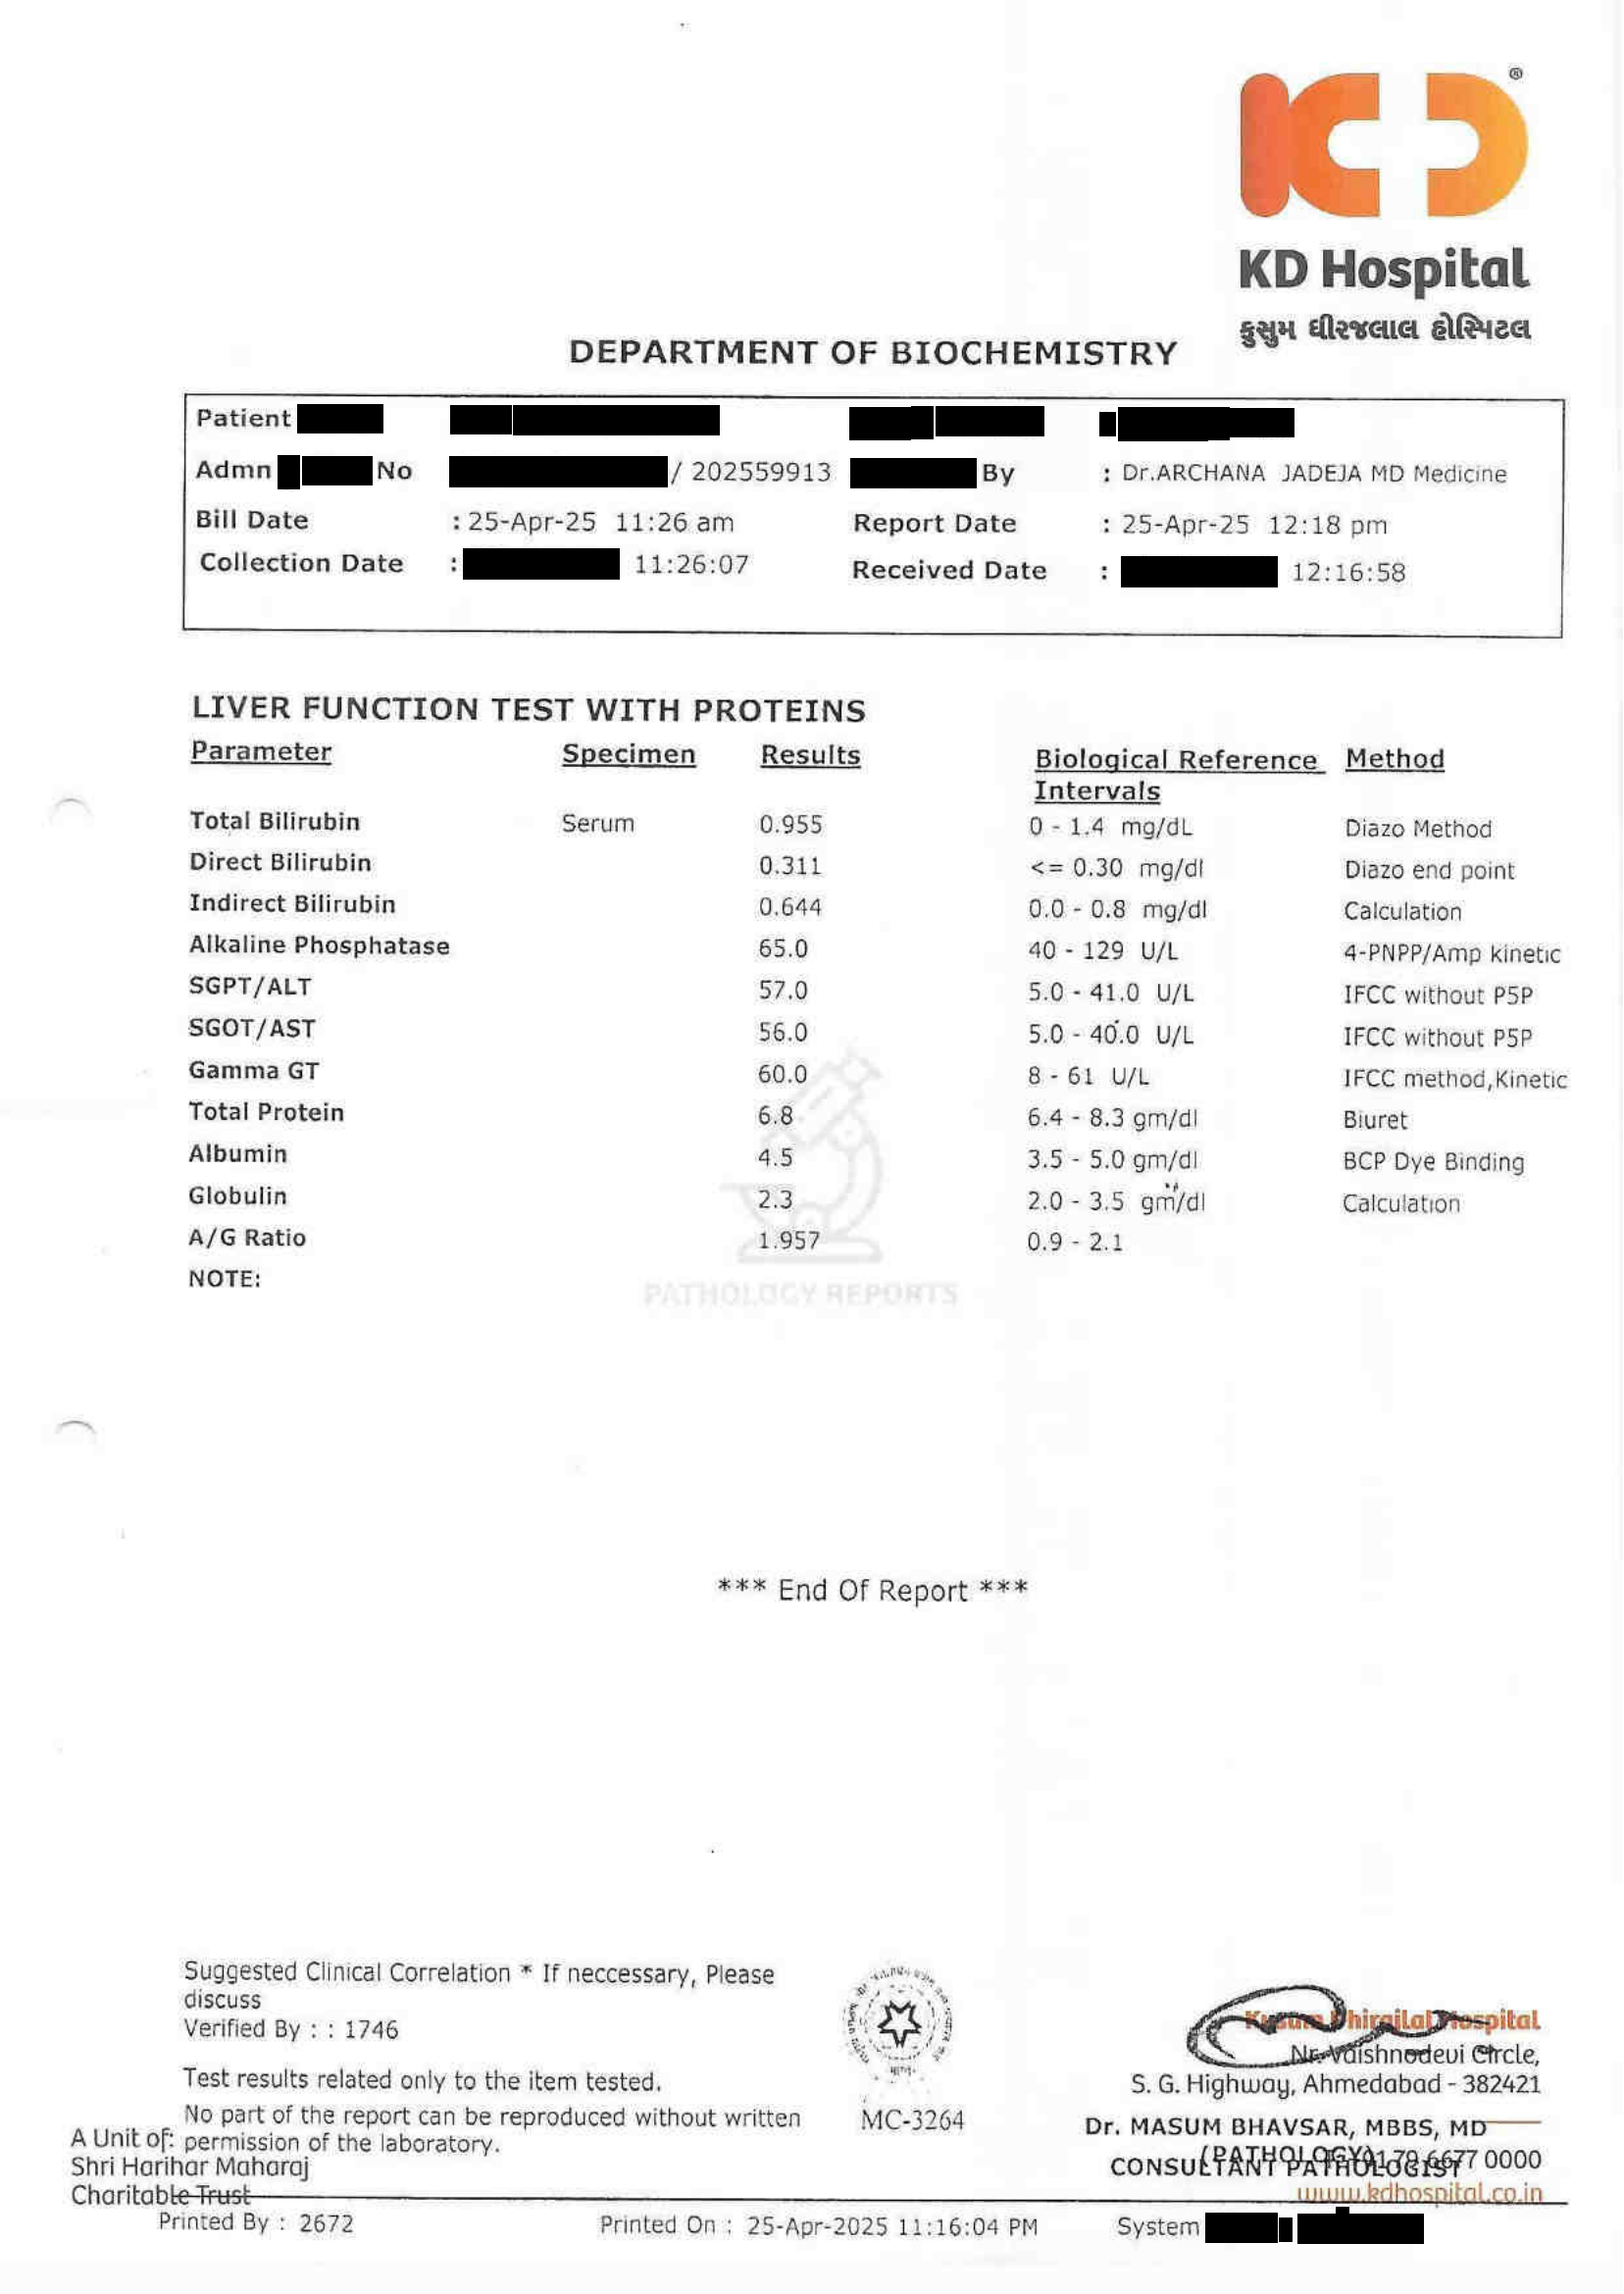

In [10]:
import cv2
from google.colab.patches import cv2_imshow

image_path = list(uploaded.keys())[0]  # gets uploaded file name
img = cv2.imread(image_path)

cv2_imshow(img)

In [12]:
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [13]:
import pytesseract
print(pytesseract.get_tesseract_version())

4.1.1


In [14]:
import pytesseract
import cv2

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
extracted_text = pytesseract.image_to_string(gray)

print("Extracted Text from Medical Report:\n")
print(extracted_text)

Extracted Text from Medical Report:

a
KD Hospital

gyn devaia aRiea
DEPARTMENT OF BIOCHEMISTRY

Paticn i a
Admn No 6, / 202559913 by : Dr.ARCHANA JADEJA MD Medicine

Bill Date :25-Apr-25 11:26am Report Date : 25-Apr-25 12:18 pm

Collection Date : (RM) 11:26:07 Received Date : J 12:16:59

  
 

     
 
             
  

 

LIVER FUNCTION TEST WITH PROTEINS

Parameter Specimen Results Biological Reference Method
Intervals

Total Bilirubin Serum 0.955 0- 1.4 ma/dl Diazo Method

Direct Bilirubin 0.311 <= 0,30 mg/dl Diazo end point

Indirect Bilirubin 0,644 0.0- 0.8 mg/dl Calculation

Alkaline Phosphatase 65.0 40-129 U/L 4-PNPP/Amp kinetic

SGPT/ALT 57.0 5.0- 41.0 U/L IFCC without P5P

SGOT/AST 56.0 5.0- 40.0 U/L IFCC without PSP

Gamma GT 60.0 8-61 U/L IFCC method, Kinetic

Total Protein 6.8 6.4 - 8.3 gm/dl Biuret

Albumin 4.5 3.5 - 5.0 gm/dl BCP Dye Binding

Globulin 23 2.0 - 3.5 gm/di Calculation

A/G Ratio 1:957 0.9- 2.1

NOTE:

*** End Of Report ***

Suggested Clinical Correlation * I

In [15]:
import pandas as pd

# Manually structuring key values extracted from the OCR output
structured_ocr_data = {
    "Test Name": [
        "Hemoglobin",
        "Total WBC Count",
        "Platelet Count",
        "ALT (SGPT)",
        "AST (SGOT)"
    ],
    "Observed Value": [
        "12.2",
        "18700",
        "1.28",
        "35.21",
        "36.78"
    ],
    "Unit": [
        "g/dl",
        "/cumm",
        "Lakhs/cmm",
        "IU/L",
        "IU/L"
    ]
}

ocr_structured_df = pd.DataFrame(structured_ocr_data)
ocr_structured_df


,Test Name,Observed Value,Unit
0,Hemoglobin,12.2,g/dl
1,Total WBC Count,18700,/cumm
2,Platelet Count,1.28,Lakhs/cmm
3,ALT (SGPT),35.21,IU/L
4,AST (SGOT),36.78,IU/L


### Structured Data Extraction from OCR Output

From the OCR-extracted text, clinically relevant laboratory parameters
were identified and converted into a structured tabular format. This
includes test names, observed values, and corresponding units.

Structuring the data enables further preprocessing, analysis, and
integration with machine learning models in subsequent milestones.
